In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
from PIL import Image
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
from Process3D import Process3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *


# leg_labs=['Micelle', 'Iso. Stripe', 'Fused Stripe', 'Hole', 'Cylinder', 'Cyl. Necklace', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [2]:
## Local
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/SYSG3/' # Clone from ANVIL: $WORK/FINAL
fp = fp_home

class Local:
    def __init__(self):
        self.files = []
    
    def load(self, fname, dims, params=(0,0), figs=(), quiet=True):
        self.files.append(self.file(fname, dims, params=params, figs=figs, quiet=True))
        
    def search(self, search_kws, quiet=True):
        ret = []
        kfigs = search_kws.pop('figs', None)
        for i in self.files:
            if all( [getattr(i, k)==search_kws[k] for k in search_kws.keys()] ):
                if kfigs: 
                    if kfigs in getattr(i, 'figs'):
                        ret.append(i)
                else: 
                    ret.append(i)
        if not quiet: 
            print("Search results: ", [i.fname for i in ret])
        return ret
    
    class file:
        def __init__(self, fname, dims, params=(0,0), figs=(), quiet=True):
            if type(fname)==str : 
                self.fname = fname
            else: 
                raise TypeError("fname should be filename as string")
            if type(dims)==tuple and len(dims)==3 :  
                self.dims = dims
            else: 
                raise TypeError("dims should be tuple of len 3")
            if type(params)==tuple and len(params)==2 : 
                self.params= params
                self.alpha = params[0]
                self.sigma = params[1]
            else: 
                raise TypeError("params should be tupe of len 2")
            if all(isinstance(n, int) for n in figs) : 
                self.figs = figs
            else: 
                raise TypeError("figs should be tuple/list of ints")
            if type(quiet)==bool: 
                if not quiet : print("{} loaded.".format(fname))
            else: 
                raise TypeError("quiet should be bool")
        
figfiles = Local()
figfiles.load('ph_a10s25e3_mic12-1.dat', (28.2, 25.8, 40.2), params=(0.10, 2.5e-03) , figs=(1,2))#, quiet=False)
figfiles.load('ph_a25s25e3_cyl24-2.dat', (18.4, 20.2, 48.2), params=(0.25, 2.5e-03) , figs=(1,4))#, quiet=False)
figfiles.load('ph_a10s375e3_str3-2.dat', (14.6, 20.2, 32.2), params=(0.10, 3.75e-03), figs=(2,) )#, quiet=False)
figfiles.load('ph_a10s5e3_hol15-2.dat' , (27.2, 32.2, 36.2), params=(0.10, 5.0e-03) , figs=(2,) )#, quiet=False)
figfiles.load('ph_a10s625e3_fus2-1.dat', (21.2, 20.2, 40.2), params=(0.10, 6.25e-03), figs=(2,) )#, quiet=False)
figfiles.load('ph_a10s010_hom-1.dat'   , (20.2, 20.2, 48.2), params=(0.10, 0.010)   , figs=(2,) )#, quiet=False)
figfiles.load('ph_a25s010_cp4-2_T.dat' , (12.2, 21.2, 54.2), params=(0.25, 0.010)   , figs=(4,) )#, quiet=False)
figfiles.load('ph_a25s025_pn6-2.dat'   , (12.2, 21.8, 70.2), params=(0.25, 0.025)   , figs=(4,) )#, quiet=False)
figfiles.load('ph_a25s040_str2-1.dat'  , (14.6, 20.2, 81.2), params=(0.25, 0.040)   , figs=(4,) )#, quiet=False)
figfiles.load('ph_a25s055_hom2-1.dat'  , (20.2, 20.2, 90.2), params=(0.25, 0.055)   , figs=(4,) )#, quiet=False)
figfiles.load('ph_a30s040_pn7-2.dat'   , (10.2, 21.2, 86.6), params=(0.30, 0.040)   , figs=(6,) )#, quiet=False)
figfiles.load('ph_a30s040_vor4-2.dat'  , (18.2, 18.2, 90.2), params=(0.30, 0.040)   , figs=(6,) )#, quiet=False)
figfiles.load('ph_a30s040_hom-2.dat'   , (15.2, 15.2, 75.2), params=(0.30, 0.040)   , figs=(6,) )#, quiet=False)

# f1 = Local('ph_a10s25e3_mic12-1.dat', (28.2, 25.8, 40.2), params=(0.10, 2.5e-03) , figs=(1,2))#, quiet=False)
# f2 = Local('ph_a25s25e3_cyl24-2.dat', (18.4, 20.2, 48.2), params=(0.25, 2.5e-03) , figs=(1,4))#, quiet=False)
# f3 = Local('ph_a10s375e3_str3-2.dat', (14.6, 20.2, 32.2), params=(0.10, 3.75e-03), figs=(2,) )#, quiet=False)
# f4 = Local('ph_a10s5e3_hol15-2.dat' , (27.2, 32.2, 36.2), params=(0.10, 5.0e-03) , figs=(2,) )#, quiet=False)
# f5 = Local('ph_a10s625e3_fus2-1.dat', (21.2, 20.2, 40.2), params=(0.10, 6.25e-03), figs=(2,) )#, quiet=False)
# f6 = Local('ph_a10s010_hom-1.dat'   , (20.2, 20.2, 48.2), params=(0.10, 0.010)   , figs=(2,) )#, quiet=False)
# f7 = Local('ph_a25s010_cp4-2_T.dat' , (12.2, 21.2, 54.2), params=(0.25, 0.010)   , figs=(4,) )#, quiet=False)
# f8 = Local('ph_a25s025_pn6-2.dat'   , (12.2, 21.8, 70.2), params=(0.25, 0.025)   , figs=(4,) )#, quiet=False)
# f9 = Local('ph_a25s040_str2-1.dat'  , (14.6, 20.2, 81.2), params=(0.25, 0.040)   , figs=(4,) )#, quiet=False)
# f10= Local('ph_a25s055_hom2-1.dat'  , (20.2, 20.2, 90.2), params=(0.25, 0.055)   , figs=(4,) )#, quiet=False)
# f11= Local('ph_a30s040_pn7-2.dat'   , (10.2, 21.2, 86.6), params=(0.30, 0.040)   , figs=(6,) )#, quiet=False)
# f12= Local('ph_a30s040_vor4-2.dat'  , (18.2, 18.2, 90.2), params=(0.30, 0.040)   , figs=(6,) )#, quiet=False)
# f13= Local('ph_a30s040_hom-2.dat'   , (15.2, 15.2, 75.2), params=(0.30, 0.040)   , figs=(6,) )#, quiet=False)

## Files needed locally
# f2_fnames = ['ph_a10s25e3_mic12-1.dat', 'ph_a25s25e3_cyl24-2.dat']
# f2_boxes  = [(28.2, 25.8, 40.2), (18.4, 20.2, 48.2)]

# f3_fnames = ['ph_a10s25e3_mic12-1.dat', 'ph_a10s375e3_str3-2.dat', 'ph_a10s5e3_hol15-2.dat', 'ph_a10s625e3_fus2-1.dat', 'ph_a10s010_hom-1.dat']
# f3_boxes  = [(28.2, 25.8, 40.2), (14.6, 20.2, 32.2), (27.2, 32.2, 36.2), (21.2, 20.2, 40.2), (20.2, 20.2, 48.2)]

# f5_fnames = ['ph_a25s25e3_cyl24-2.dat', 'ph_a25s010_cp4-2_T.dat', 'ph_a25s025_pn6-2.dat', 'ph_a25s040_str2-1.dat', 'ph_a25s055_hom2-1.dat']
# f5_boxes  = [(18.4, 20.2, 48.2), (12.2, 21.2, 54.2), (12.2, 21.8, 70.2), (14.6, 20.2, 81.2), (20.2, 20.2, 90.2)]

# f7_fnames = ['ph_a30s040_pn7-2.dat', 'ph_a30s040_vor4-2.dat', 'ph_a30s040_hom-2.dat']
# f7_boxes  = [(10.2, 21.2, 86.6), (18.2, 18.2, 90.2), (15.2, 15.2, 75.2)]

# Figure 7

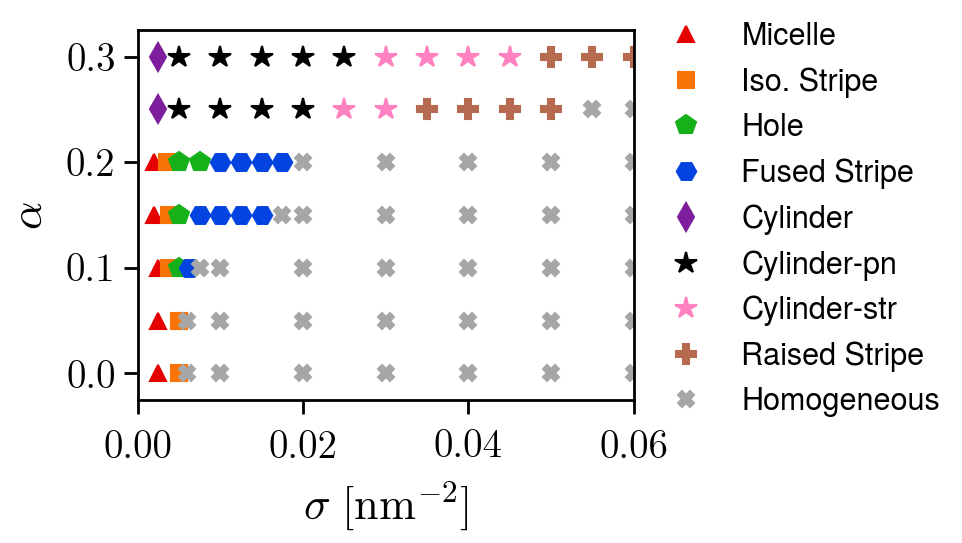

In [4]:
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':12}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':12}, 
    'hol': {'marker':'p', 'c':'xkcd:green' , 'ms':15}, 
    'fus': {'marker':'H', 'c':'xkcd:blue', 'ms':14}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':14},
    'cyl-pn': {'marker':'*', 'c':'xkcd:black', 'ms':16},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':16},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':14},
    'hom': {'marker':'X', 'c':'0.65' , 'ms':12}
}
leg_ms = [Line2D([0],[0], **morph_ms[mor], lw=0) for mor in morph_ms.keys()]
leg_labs=['Micelle', 'Iso. Stripe', 'Hole', 'Fused Stripe', 'Cylinder', 'Cylinder-pn', 'Cylinder-str', 'Raised Stripe', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

for (a,s) in [(0.00, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 3.75e-03, 5e-03, 6.25e-03, 7.5e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.15, i) for i in (2.0e-03, 3.75e-03, 5e-03, 7.5e-03, 1e-02, 1.25e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.20, i) for i in (2.0e-03, 3.5e-03, 5e-03, 7.5e-03, 1e-02, 1.25e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.25, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 4.0e-02, 4.5e-02, 5e-02, 5.5e-02, 6e-02)] +\
             [(0.30, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 
                                  4e-02, 4.5e-02, 5e-02, 5.5e-02, 6.0e-02)]:
    try: morph, minF, mul, done = get_Morph(a,s)
    except ValueError: 
        print("Error: Couldn't find {}, {}".format(a, s))
        break
    x,y,mor = s, a, morph
    
    plt.plot(x,y, lw=0, **morph_ms[mor])
    
## Formatting

plt.xlim(0, 0.060)
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02, -0.08), fontsize=22)

f = plt.gcf()
plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=32)
f.axes[0].tick_params(axis='both', direction='out', length=10, labelsize=28)
plt.ylabel(r'$\alpha$', fontsize=32)


# plt.plot(np.arange(0.025, 0.061, 0.005), [0.20]*8, **morph_ms['hom'], lw=0)
# plt.plot(np.arange(0.025, 0.061, 0.005), [0.15]*8, **morph_ms['hom'], lw=0)
# plt.plot(np.arange(0.015, 0.061, 0.005), [0.10]*10, **morph_ms['hom'], lw=0)
# plt.plot(np.arange(0.015, 0.061, 0.005), [0.05]*10, **morph_ms['hom'], lw=0)
# plt.plot(np.arange(0.015, 0.061, 0.005), [0.00]*10, **morph_ms['hom'], lw=0)

tjy.ticks()

plt.savefig('imgs/phase.pdf')

# Figure 1

In [115]:
f1_files = figfiles.search({'figs': 1}, quiet=False)

Search results:  ['ph_a10s25e3_mic12-1.dat', 'ph_a25s25e3_cyl24-2.dat']


In [112]:
a10_mic = Process3D(
    **dict(fname = f1_files[0].fname, dims=f1_files[0].dims, fprefix=fp, 
           n_coarse=1, zmax=15.0, reflect_over='sw')
)
a10_mic.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 35, 
    zcenter = -0.10
)
fig = a10_mic.Figure(fprefix = fp,
    xrange = [-28.21, 28.21], xticks = [-20, -10, 0, 10, 20], 
    zrange = [0, 15.2], zticks = [5, 15] 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


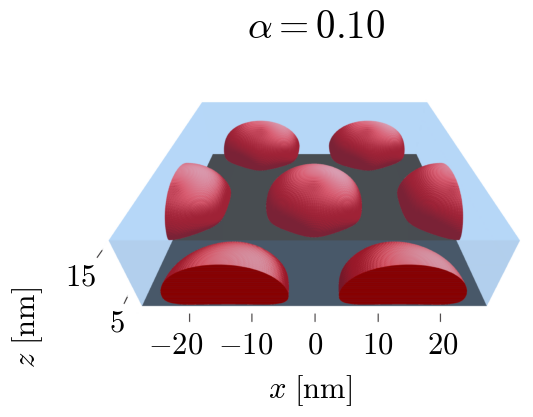

In [46]:
img = np.asarray(Image.open("../figures/SYSG3/a10_mic-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=22)
k2 = dict(transform=plt.gca().transAxes, fontsize=28, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=22, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.583, 1.175, r'$\alpha=0.10$', **k2)
## x
plt.text(0.244, 0.145, p(-20), **k1)
plt.text(0.384, 0.145, p(-10), **k1)
plt.text(0.563, 0.145, p(0), **k1)
plt.text(0.675, 0.145, p(10),**k1)
plt.text(0.805, 0.145, p(20),**k1)
## y
plt.text(0.075, 0.367, p(15),**k1)
plt.text(0.165, 0.215, p(5), **k1)
## labs
plt.text(0.57, 0.00, r'$x~\mathrm{[nm]}$', **k3)
plt.text(0.00, 0.13, r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a10_mic.pdf')
plt.show()

In [113]:
a25_cyl = Process3D(
    **dict(fname=f1_files[1].fname, dims=f1_files[1].dims, fprefix=fp, 
           n_coarse=1, zmax=25.0, reflect_over='sw')
)
a25_cyl.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 25, 
    zcenter = -0.10
)
fig = a25_cyl.Figure(fprefix = fp,
    xrange = [-18.41, 18.41], xticks = [-15, 0, 15], 
    zrange = [0, 25.2], zticks = [0, 15, 25], 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


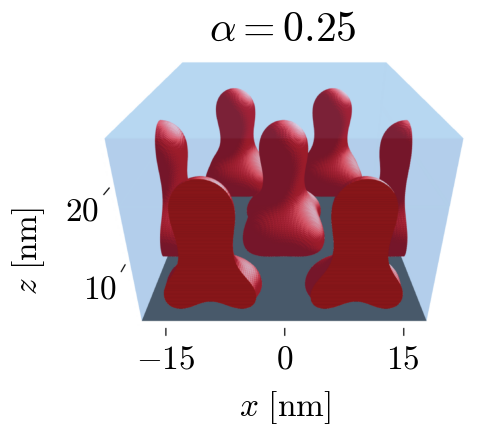

In [38]:
img = np.asarray(Image.open("../figures/SYSG3/a25_cyl-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=24)
k2 = dict(transform=plt.gca().transAxes, fontsize=30, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=24, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.595, 1.040, r'$\alpha = 0.25$', **k2)
## x
plt.text(0.274, 0.155, p(-15), **k1)
plt.text(0.579, 0.155, p(0), **k1)
plt.text(0.82,  0.155, p(15),**k1)
## y
plt.text(0.120, 0.555, p(20), **k1)
plt.text(0.158, 0.342, p(10), **k1)
## labs
plt.text(0.60, 0.025, r'$x~\mathrm{[nm]}$', **k3)
plt.text(0.04, 0.38 , r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a25_cyl.pdf')
plt.show()

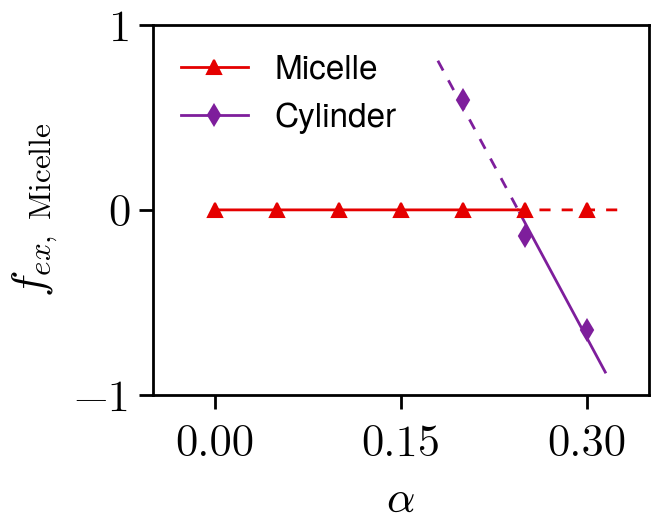

In [75]:
f = plotF('sigma', 2.5e-03, ('mic', 'cyl'), ref_morph='mic', 
          morph_xxs = {'cyl': (0.20, 0.315)}, 
          meta_xxs = {'cyl': [[0.18, 0.246]], 'mic': [[0.244, 0.325]]},
          show_raw=True, k_dict = {'mic': 3, 'cyl': 1}, s_dict = {'mic':1e-07, 'cyl':1e-01},
          ls_meta = (0, (4,4))
)

plt.xlim(-0.05, 0.35)
plt.ylim(-1, 1)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['mic'], label='Micelle'),
    Line2D([0], [0], **morph_ms['cyl'], label='Cylinder'),
], loc=(0.03, 0.67), fontsize=24)

plt.xlabel(r'$\alpha$', fontsize=32)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=32)
f[0].axes[0].set_xticks([0.0, 0.15, 0.30])
f[0].axes[0].set_yticks([-1.0, 0, 1.0])
plt.ylabel(r'$f_{ex,\ \mathrm{Micelle}}$', fontsize=32)

tjy.ticks()
plt.savefig('imgs/sparse_f.pdf')

# Figure 2

In [3]:
f2_files = figfiles.search({'figs': 2}, quiet=False)

Search results:  ['ph_a10s25e3_mic12-1.dat', 'ph_a10s375e3_str3-2.dat', 'ph_a10s5e3_hol15-2.dat', 'ph_a10s625e3_fus2-1.dat', 'ph_a10s010_hom-1.dat']


In [4]:
a10_mic = Process3D(
    **dict(fname = f2_files[0].fname, dims=f2_files[0].dims, fprefix=fp, 
           n_coarse=1, zmax=15.0, reflect_over='sw')
)
a10_mic.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 35, 
    zcenter = -0.10
)
fig = a10_mic.Figure(fprefix = fp,
    xrange = [-28.21, 28.21], xticks = [-20, -10, 0, 10, 20], 
    zrange = [0, 15.2], zticks = [5, 15] 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


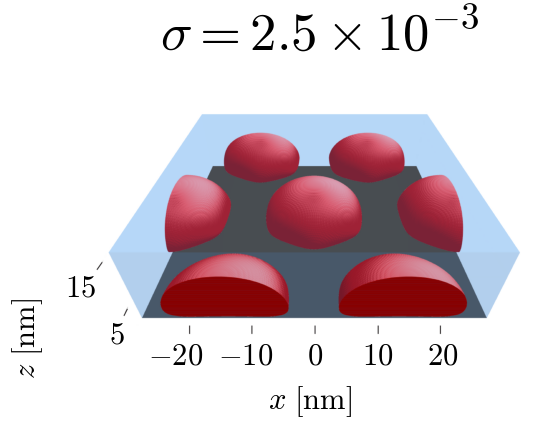

In [103]:
img = np.asarray(Image.open("../figures/SYSG3/a10_mic-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=22)
k2 = dict(transform=plt.gca().transAxes, fontsize=38, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=22, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.590, 1.175, r'$\sigma=2.5\times10^{-3}$', **k2)
## x
plt.text(0.244, 0.145, p(-20), **k1)
plt.text(0.384, 0.145, p(-10), **k1)
plt.text(0.563, 0.145, p(0), **k1)
plt.text(0.675, 0.145, p(10),**k1)
plt.text(0.805, 0.145, p(20),**k1)
## y
plt.text(0.075, 0.367, p(15),**k1)
plt.text(0.165, 0.215, p(5), **k1)
## labs
plt.text(0.57, 0.00, r'$x~\mathrm{[nm]}$', **k3)
plt.text(0.00, 0.13, r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a10_mic-2.pdf')
plt.show()

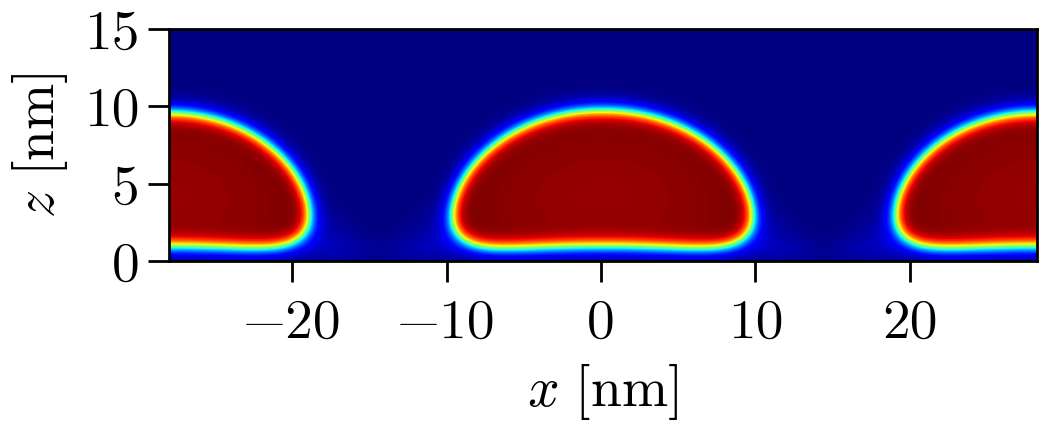

In [5]:
pha3d = Pha3D(f2_files[0].fname, f2_files[0].dims, fprefix=fp)

h = pha3d.plot_proj(which='xz', yslice=0.0,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=40)
h.axes[0].set_ylabel(r'$z\ [\mathrm{nm}]$', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=40)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.savefig('../figures/SYSG3/a10_mic-xy.png')
plt.show()

In [7]:
a10_str = Process3D(
    **dict(fname = f2_files[1].fname, dims=f2_files[1].dims, fprefix=fp, 
           n_coarse=1, zmax=15.0, reflect_over='sw')
)
a10_str.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 25, 
    zcenter = -0.10
)
fig = a10_str.Figure(fprefix = fp,
    xrange = [-15.21, 15.21], xticks = [-10, 0, 10], 
    zrange = [0, 15.2], zticks = [5, 15] 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


In [ ]:
img = np.asarray(Image.open("../figures/SYSG3/a10_str-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=24)
k2 = dict(transform=plt.gca().transAxes, fontsize=40, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=24, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.620, 1.055, r'$\sigma=3.75\times10^{-3}$', **k2)
## x
plt.text(0.235, 0.135, p(-10), **k1)
plt.text(0.548, 0.135, p(0), **k1)
plt.text(0.775, 0.135, p(10),**k1)
## y
plt.text(0.015, 0.550, p(15),**k1)
plt.text(0.115, 0.260, p(5), **k1)
## labs
plt.text(0.58, 0.00, r'$x~\mathrm{[nm]}$', **k3)
# plt.text(0.00, 0.30, r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a10_str.pdf')
plt.show()

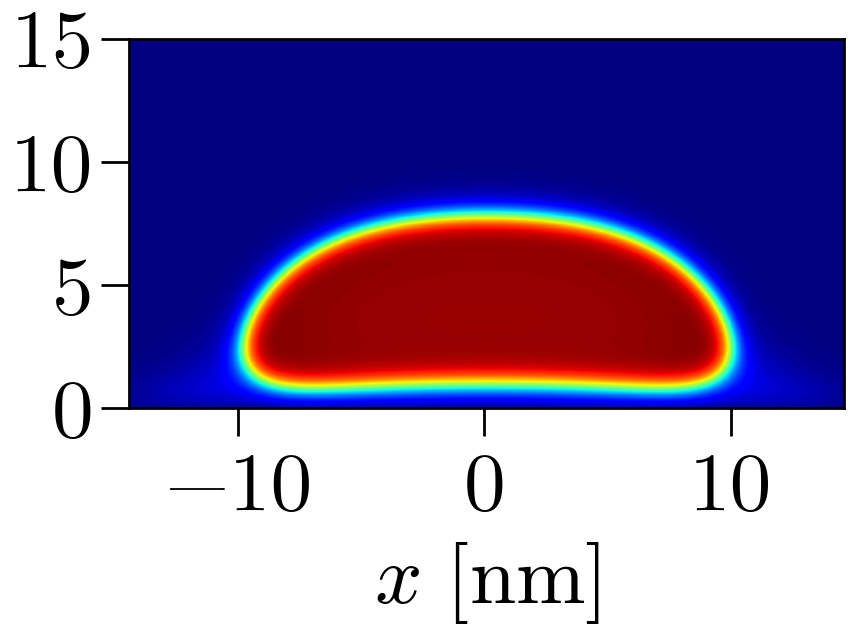

In [11]:
pha3d = Pha3D(f2_files[1].fname, f2_files[1].dims, fprefix=fp)

h = pha3d.plot_proj(which='xz', yslice=0.0,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=60)
h.axes[0].set_ylabel(r'', fontsize=50)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=60)
h.axes[0].set_xticks([-10, 0, 10])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.savefig('../figures/SYSG3/a10_str-xy.png')
plt.show()

In [14]:
a10_hol = Process3D(
    **dict(fname = f2_files[2].fname, dims=f2_files[2].dims, fprefix=fp, 
           n_coarse=1, zmax=15.0, reflect_over='nw')
)
a10_hol.Set_camera(
    opt = 'x', 
    d = 2.2,
    a = 35, 
    zcenter = -0.10
)
fig = a10_hol.Figure(fprefix = fp,
    xrange = [-27.21, 27.21], xticks = [-20, -10, 0, 10, 20], 
    yrange = [0, 64.41], 
    zrange = [0, 15.2], zticks = [5, 15], 
    width=800
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


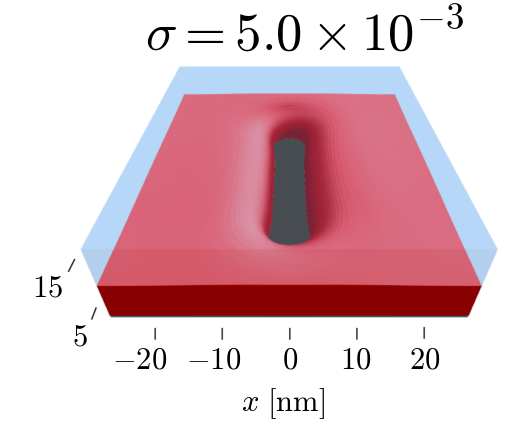

In [16]:
img = np.asarray(Image.open("../figures/SYSG3/a10_hol-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=22)
k2 = dict(transform=plt.gca().transAxes, fontsize=38, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=22, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.595, 1.025, r'$\sigma=5.0\times10^{-3}$', **k2)
## x
plt.text(0.205, 0.120, p(-20), **k1)
plt.text(0.355, 0.120, p(-10), **k1)
plt.text(0.548, 0.120, p(0), **k1)
plt.text(0.665, 0.120, p(10),**k1)
plt.text(0.805, 0.120, p(20),**k1)
## y
plt.text(0.045, 0.325, p(15),**k1)
plt.text(0.125, 0.185, p(5), **k1)
## labs
plt.text(0.55, 0.00, r'$x~\mathrm{[nm]}$', **k3)
# plt.text(0.00, 0.30, r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a10_hol.pdf')
plt.show()

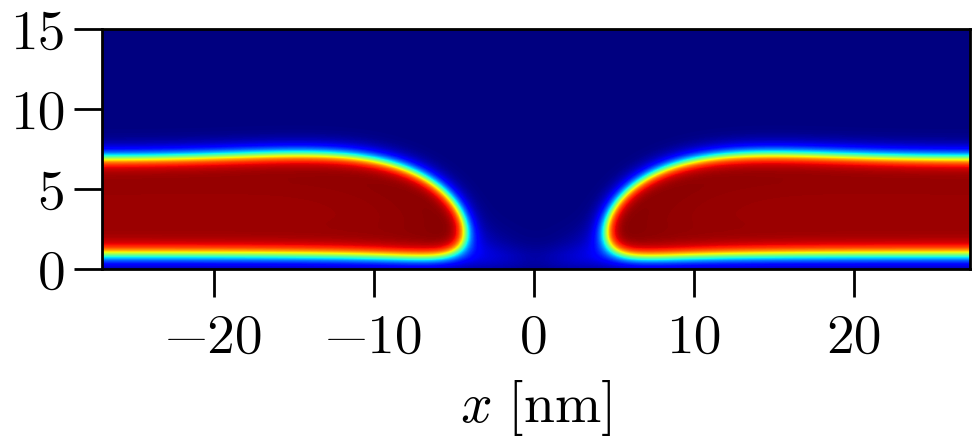

In [18]:
pha3d = Pha3D(f2_files[2].fname, f2_files[2].dims, fprefix=fp)

h = pha3d.plot_proj(which='xz', yslice=f2_files[2].dims[1]/2,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=40)
h.axes[0].set_ylabel(r'', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=40)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.savefig('../figures/SYSG3/a10_hol-xy.png')
plt.show()

In [19]:
a10_fus = Process3D(
    **dict(fname = f2_files[3].fname, dims=f2_files[3].dims, fprefix=fp, 
           n_coarse=3, zmax=15.0, reflect_over='sw')
)
a10_fus.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 25, 
    zcenter = -0.10
)
fig = a10_fus.Figure(fprefix = fp,
    xrange = [-21.41, 21.41], xticks = [-20, -10, 0, 10, 20], 
    yrange = [-20.21, 20.21], 
    zrange = [0, 15.2], zticks = [5, 15], 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


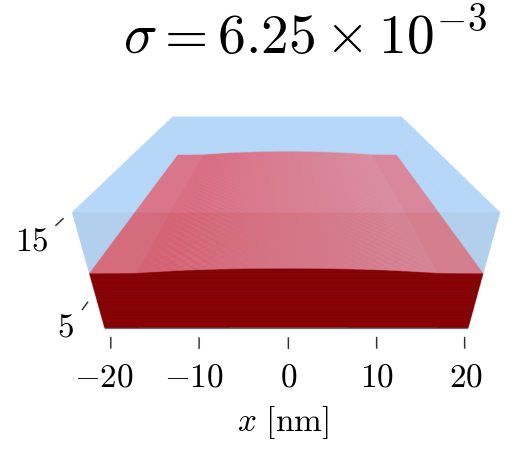

In [106]:
img = np.asarray(Image.open("../figures/SYSG3/a10_fus-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=24)
k2 = dict(transform=plt.gca().transAxes, fontsize=40, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=24, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.595, 1.180, r'$\sigma=6.25\times10^{-3}$', **k2)
## x
plt.text(0.130, 0.140, p(-20), **k1)
plt.text(0.310, 0.140, p(-10), **k1)
plt.text(0.544, 0.140, p(0), **k1)
plt.text(0.705, 0.140, p(10),**k1)
plt.text(0.885, 0.140, p(20),**k1)
## y
plt.text(0.010, 0.565, p(15),**k1)
plt.text(0.095, 0.295, p(5), **k1)
## labs
plt.text(0.55, 0.00, r'$x~\mathrm{[nm]}$', **k3)
# plt.text(0.00, 0.30, r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a10_fus.pdf')
plt.show()

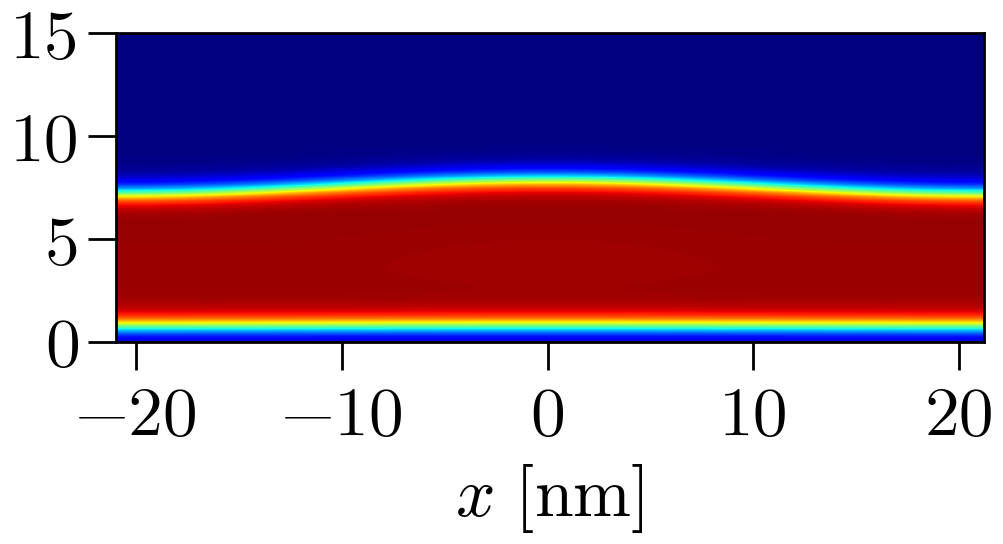

In [20]:
pha3d = Pha3D(f2_files[3].fname, f2_files[3].dims, fprefix=fp)

h = pha3d.plot_proj(which='xz', yslice=0.0,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=50)
h.axes[0].set_ylabel(r'', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=50)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.savefig('../figures/SYSG3/a10_fus-xy.png')
plt.show()

In [21]:
a10_hom = Process3D(
    **dict(fname = f2_files[4].fname, dims=f2_files[4].dims, fprefix=fp, 
           n_coarse=3, zmax=15.0, reflect_over='sw')
)
a10_hom.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 25, 
    zcenter = -0.10
)
fig = a10_hom.Figure(fprefix = fp,
    xrange = [-20.21, 20.21], xticks = [-20, -10, 0, 10, 20], 
    yrange = [-20.21, 20.21], 
    zrange = [0, 15.2], zticks = [5, 15], 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


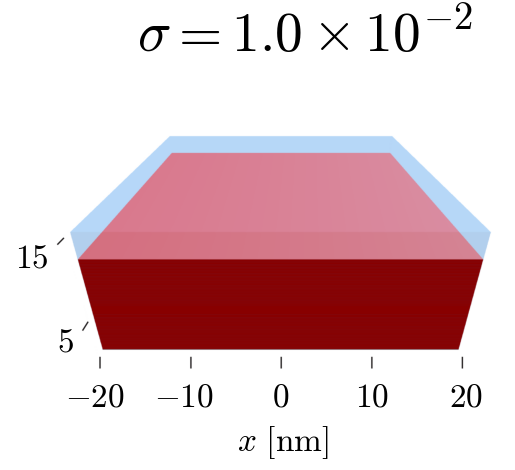

In [107]:
img = np.asarray(Image.open("../figures/SYSG3/a10_hom-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=24)
k2 = dict(transform=plt.gca().transAxes, fontsize=40, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=24, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.595, 1.250, r'$\sigma=1.0\times10^{-2}$', **k2)
## x
plt.text(0.110, 0.140, p(-20), **k1)
plt.text(0.290, 0.140, p(-10), **k1)
plt.text(0.528, 0.140, p(0), **k1)
plt.text(0.695, 0.140, p(10),**k1)
plt.text(0.885, 0.140, p(20),**k1)
## y
plt.text(0.010, 0.575, p(15),**k1)
plt.text(0.095, 0.310, p(5), **k1)
## labs
plt.text(0.55, 0.00, r'$x~\mathrm{[nm]}$', **k3)
# plt.text(0.00, 0.30, r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a10_hom.pdf')
plt.show()

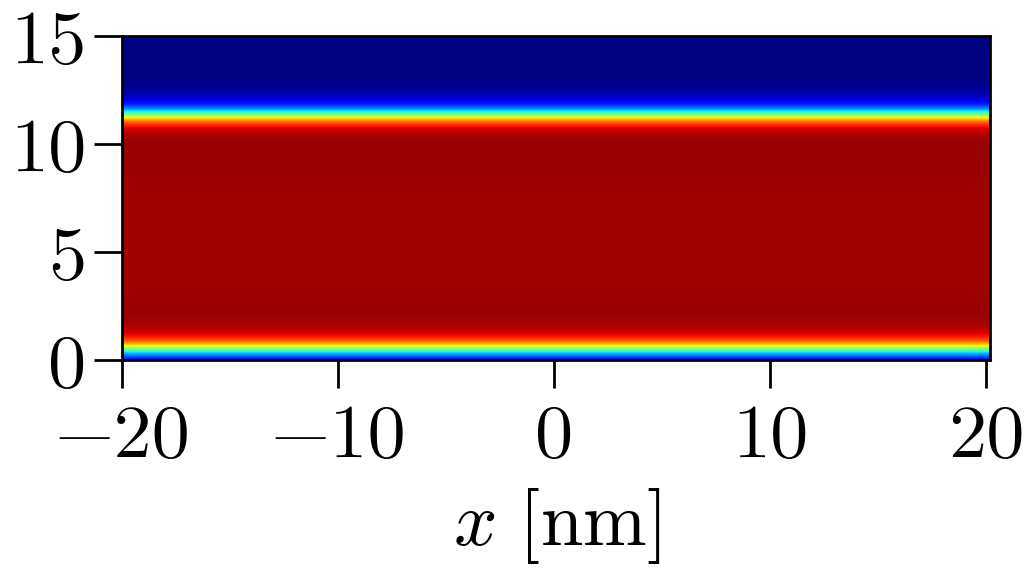

In [23]:
pha3d = Pha3D(f2_files[4].fname, f2_files[4].dims, fprefix=fp)

h = pha3d.plot_proj(which='xz', yslice=0.0,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=55)
h.axes[0].set_ylabel(r'', fontsize=45)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=55)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.savefig('../figures/SYSG3/a10_hom-xy.png')
plt.show()

# Figure 3

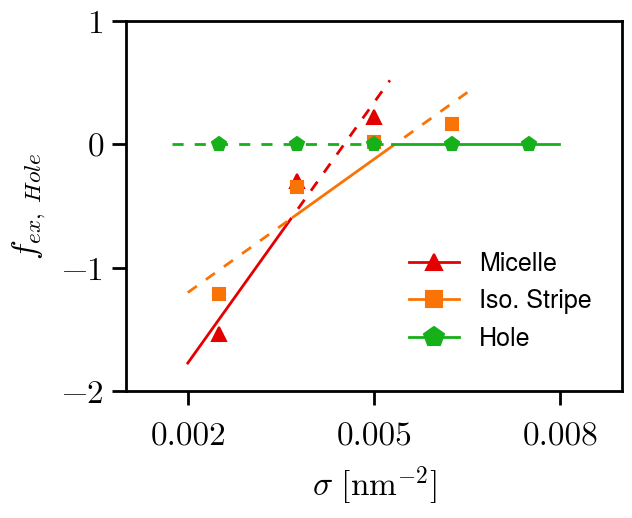

In [12]:
f = plotF('alpha', 0.10, ('mic', 'str', 'hol'), ref_morph='hol', 
          morph_xxs = {'mic': (2e-03, 5.5e-03), 'str': (2e-03, 6.5e-03), 'hol': (0.002, 0.008)},
          meta_xxs = {'mic': [[0.00357, 0.00525]], 'str': [[0.002, 0.00370], [0.0052, 0.0065]], 'hol': [[0.00175, 0.0053]]}, 
          show_raw=True, s_dict = {'hol':1e-07, 'mic':1e-01, 'str':2e-01}, k_dict = {'mic': 1, 'str': 1, 'hol': 3},
          ls_meta = (0, (4,4))
)
plt.xlim(0.001, 0.009)
plt.ylim(-2.00, 1.00)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['mic'], label='Micelle'),
    Line2D([0], [0], **morph_ms['str'], label='Iso. Stripe'),
    Line2D([0], [0], **morph_ms['hol'], label='Hole')
], loc=(0.55, 0.08), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_xticks([0.002, 0.005, 0.008])
plt.ylabel(r'$f_{ex,\ Hole}$', fontsize=24)
tjy.ticks()

plt.savefig('imgs/a10_f-a.pdf')

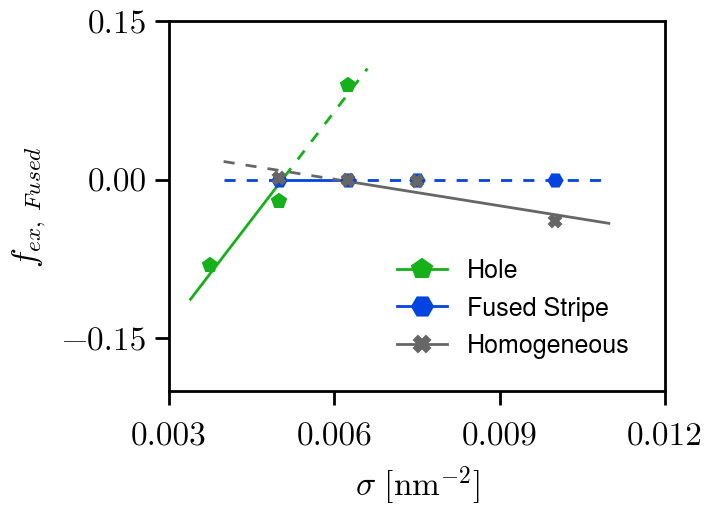

In [29]:
f = plotF('alpha', 0.10, ('hol', 'fus', 'hom'), ref_morph='fus', 
          morph_filter = {'hol':(0.003, 0.0063), 'hom': (0.005, 0.011), 'fus': (0.004, 0.011)}, 
          morph_xxs = {'hol': (0.0034, 0.0067), 'hom':(0.004, 0.011)},
          meta_xxs = {'hol': [[0.0051, 0.0066]], 'fus': [[0.004, 0.005], [0.0062, 0.011]], 'hom': [[0.004, 0.006]]},
          show_raw=True, s_dict = {'hol':1e-01, 'fus':1e-07, 'hom':1e-01}, k_dict = {'hol': 1, 'fus': 3, 'hom': 1}, 
          ls_meta=(0, (4,4))
)
plt.xlim(0.003, 0.012)
plt.ylim(-0.20, 0.15)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['hol'], label='Hole'),
    Line2D([0], [0], **morph_ms['fus'], label='Fused Stripe'),
    Line2D([0], [0], **morph_ms['hom'], label='Homogeneous')
], loc=(0.44, 0.06), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_xticks([0.003, 0.006, 0.009, 0.012])
f[0].axes[0].set_yticks([-0.15, 0, 0.15])
plt.ylabel(r'$f_{ex,\ Fused}$', fontsize=24)
tjy.ticks()

plt.savefig('imgs/a10_f-b.pdf')

# Figure 4

In [3]:
f4_files = figfiles.search({'figs': 4}, quiet=False)

Search results:  ['ph_a25s25e3_cyl24-2.dat', 'ph_a25s010_cp4-2_T.dat', 'ph_a25s025_pn6-2.dat', 'ph_a25s040_str2-1.dat', 'ph_a25s055_hom2-1.dat']


In [5]:
a25_cyl = Process3D(
    **dict(fname=f4_files[0].fname, dims=f4_files[0].dims, fprefix=fp, 
           n_coarse=1, zmax=25.0, reflect_over='sw')
)
a25_cyl.Set_camera(
    opt = 'x', 
    d = 2.0,
    a = 25, 
    zcenter = -0.10
)
fig = a25_cyl.Figure(fprefix = fp,
    xticks = [-15, 0, 15], 
    zticks = [10, 20], 
)

Data processed into self.data
Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


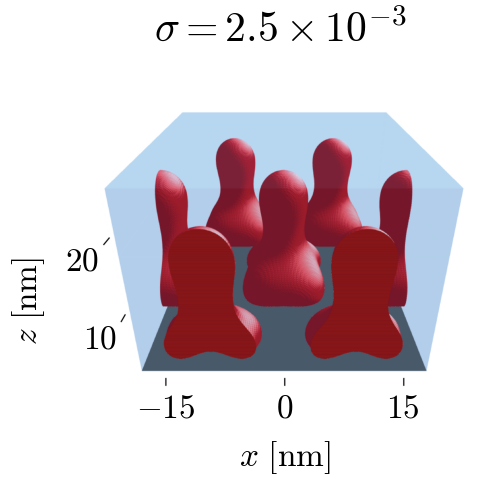

In [27]:
img = np.asarray(Image.open("../figures/SYSG3/a25_cyl-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=24)
k2 = dict(transform=plt.gca().transAxes, fontsize=30, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=24, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.590, 1.175, r'$\sigma=2.5\times10^{-3}$', **k2)
## x
plt.text(0.274, 0.155, p(-15), **k1)
plt.text(0.579, 0.155, p(0), **k1)
plt.text(0.82,  0.155, p(15),**k1)
## y
plt.text(0.120, 0.555, p(20), **k1)
plt.text(0.158, 0.342, p(10), **k1)
## labs
plt.text(0.60, 0.025, r'$x~\mathrm{[nm]}$', **k3)
plt.text(0.04, 0.38 , r'$z~\mathrm{[nm]}$', **k3, rotation=90)

plt.savefig('../figures/SYSG3/a25_cyl-2.pdf')
plt.show()

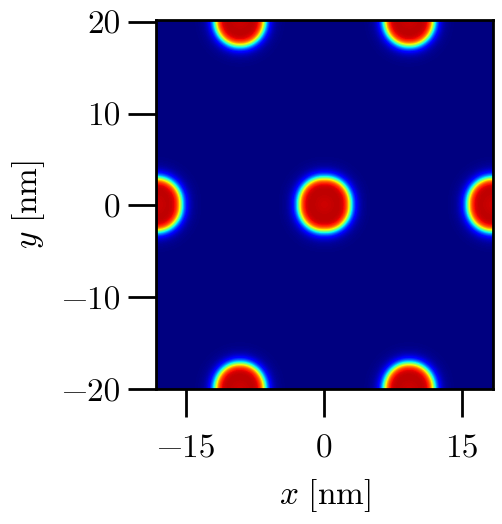

In [29]:
pha3d = Pha3D(f4_files[0].fname, f4_files[0].dims, fprefix=fp)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=10,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=24)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=24)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=24)
h.axes[0].set_xticks([-15, 0, 15])
h.axes[0].set_yticks([-20, -10, 0, 10, 20])
plt.savefig('../figures/SYSG3/a25_cyl-xy.png')
plt.show()

In [4]:
a25_cp = Process3D(
    **dict(fname=f4_files[1].fname, dims=f4_files[1].dims, fprefix=fp, 
           n_coarse=3, zmax=35.0, reflect_over='nw')
)
# a25_cp.Set_camera(
#     opt = 'custom', 
#     d = 2.0,
#     a = 25, 
#     zcenter = -0.10,
    
#     eye_kws = dict(
#         x=d/np.sqrt(3), y=-d/np.sqrt(3), z=d/np.sqrt(3)
#     )
# )
# fig = a25_cp.Figure(fprefix = fp,
#     xrange = [-12.21, 12.21], xticks = [-10, 0, 10], 
#     zrange = [0, 35.2], zticks = [10, 20, 30], 
# )

Data processed into self.data


In [8]:
f4_files[1].dims

(12.2, 21.2, 54.2)

In [6]:
a25_cp.Set_camera(
    opt = 'custom', 
    eye_kws = dict(
        x=1.0, y=-2.0, z=1.1
    )
)
fig = a25_cp.Figure(fprefix = fp,
    xticks = [-10, 0, 10], 
    yticks = [0, 20, 40], 
    zrange=[0,35.2], zticks = [10, 20, 30], 
)

Camera set to self.camera
Wrote to E:/Downloads/SYSG3/pha_vol.html
Opening...


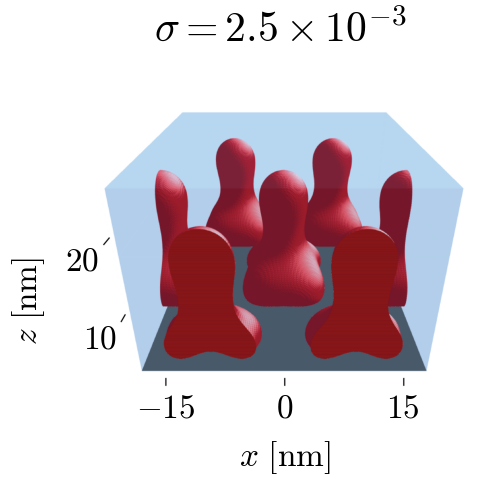

In [27]:
img = np.asarray(Image.open("../figures/SYSG3/a25_cp-empty.png"))
plt.imshow(img)
k1 = dict(transform=plt.gca().transAxes, fontsize=24)
k2 = dict(transform=plt.gca().transAxes, fontsize=30, horizontalalignment='center')
k3 = dict(transform=plt.gca().transAxes, fontsize=24, horizontalalignment='center')
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## title
plt.text(0.590, 1.175, r'$\sigma=1.0\times10^{-2}$', **k2)
## x
plt.text(0.274, 0.155, p(-15), **k1)
plt.text(0.579, 0.155, p(0), **k1)
plt.text(0.82,  0.155, p(15),**k1)
## y
plt.text(0.120, 0.555, p(20), **k1)
plt.text(0.158, 0.342, p(10), **k1)
## labs
plt.text(0.60, 0.025, r'$x~\mathrm{[nm]}$', **k3)
plt.text(0.04, 0.38 , r'$z~\mathrm{[nm]}$', **k3, rotation=90)

# plt.savefig('../figures/SYSG3/a25_cp.pdf')
plt.show()

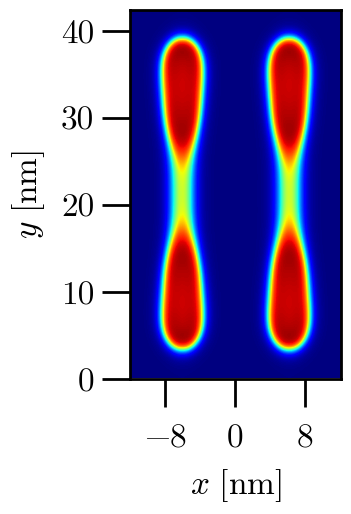

In [30]:
pha3d = Pha3D(f4_files[1].fname, f4_files[1].dims, fprefix=fp)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=24,
                    zmax=15.0, reflect_box=True, reflect_over='nw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=24)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=24)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=24)
h.axes[0].set_xticks([-8, 0, 8])
h.axes[0].set_yticks([0, 10, 20, 30, 40])
plt.savefig('../figures/SYSG3/a25_cp-xy.png')
plt.show()

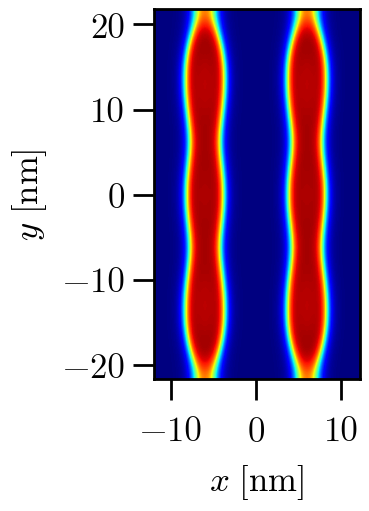

In [26]:
pha3d = Pha3D(f5_fnames[2], f5_boxes[2], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=35.6,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=25)
h.axes[0].set_xticks([-10, 0, 10])
h.axes[0].set_yticks([-20, -10, 0, 10, 20])
plt.show()

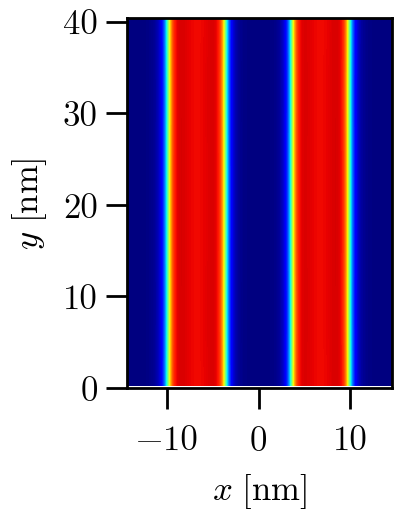

In [13]:
pha3d = Pha3D(f5_fnames[3], f5_boxes[3], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=45,
                    zmax=15.0, reflect_box=True, reflect_over='nw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=25)
h.axes[0].set_xticks([-10, 0, 10])
h.axes[0].set_yticks([0, 10, 20, 30, 40])
plt.show()

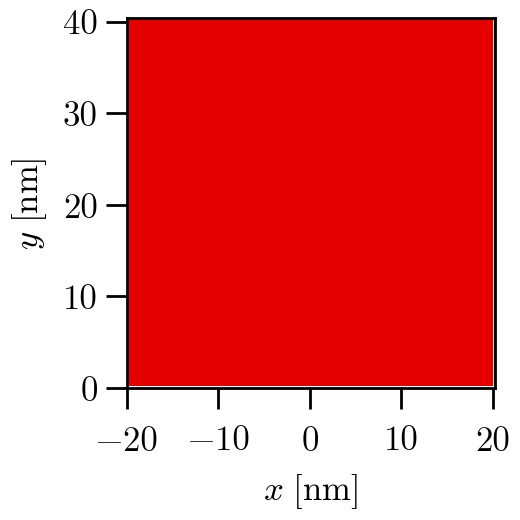

In [6]:
pha3d = Pha3D(f5_fnames[4], f5_boxes[4], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=50,
                    zmax=15.0, reflect_box=True, reflect_over='nw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=25)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 10, 20, 30, 40])
plt.show()

# Figure 6

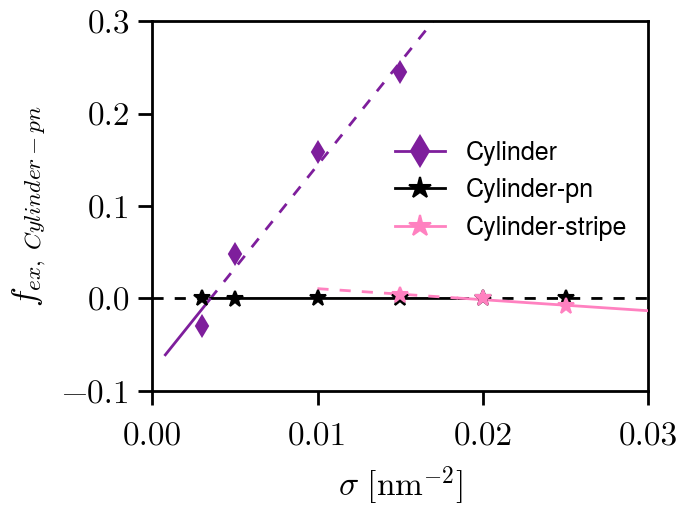

In [31]:
f = plotF('alpha', 0.25, ('cyl', 'cyl-pn', 'cyl-str'), ref_morph='cyl-pn',  show_raw=True, 
          morph_filter = {'cyl': (0.0026, 0.015), 'cyl-pn': (0, 0.025), 'cyl-str': (0.010, 0.025)},
          morph_xxs = {'cyl': (8.0e-04, 0.015), 'cyl-pn': (2.5e-03, 0.015), 'cyl-str':(0.01, 0.030)}, 
          meta_xxs = {'cyl': [[0.0035, 1]], 'cyl-pn': [[0, 0.0035], [0.0185, 0.030]], 'cyl-str': [[0.010, 0.0185]]}, 
          k_dict = {'cyl-pn': 3, 'cyl': 1, 'cyl-str': 1},
          s_dict = {'cyl-pn':1e-08, 'cyl':1e-01, 'cyl-str':1e-01},
          ls_meta = (0, (4,4))
)
plt.xlim(0.0, 0.030)
plt.ylim(-0.10, 0.30)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['cyl'], label='Cylinder'),
    Line2D([0], [0], **morph_ms['cyl-pn'], label='Cylinder-pn'),
    Line2D([0], [0], **morph_ms['cyl-str'], label='Cylinder-stripe')
], loc=(0.47, 0.38), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
plt.ylabel(r'$f_{ex,\ Cylinder-pn}$', fontsize=24)
tjy.ticks()

plt.savefig('imgs/a25_f-a.pdf')

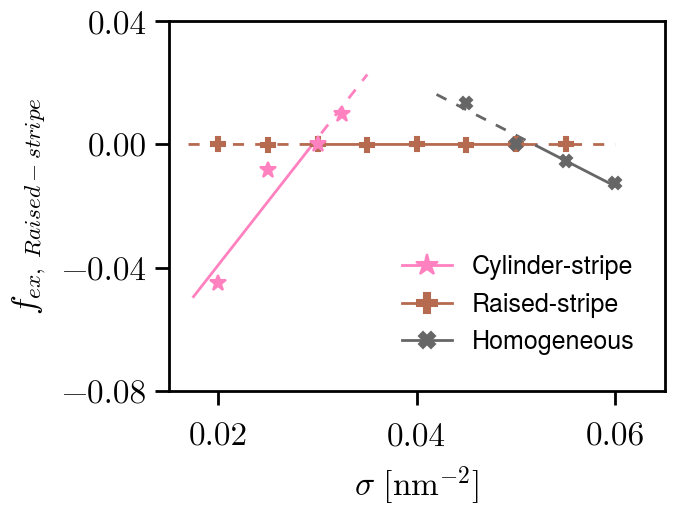

In [32]:
f = plotF('alpha', 0.25, ('raised', 'hom', 'cyl-str'), ref_morph='raised',  show_raw=True, 
          morph_filter = {'raised':(0.020,0.060), 'hom': (0.045, 0.060), 'cyl-str':(0.020, 0.033)}, 
          morph_xxs = {'hom': (0.043, 0.060), 'cyl-str':(0.0175, 0.035)},
          meta_xxs = {'cyl-str': [[0.029, 0.035]], 'raised': [[0.017, 0.03], [0.051, 0.06]], 'hom': [[0.042, 0.0521]]},
          k_dict = {'cyl': 1, 'cyl-str': 1, 'raised': 3, 'hom': 1}, 
          s_dict = {'raised':1e-07, 'cyl-str':1e-01, 'hom':1e-01}, 
          ls_meta = (0, (4,4))
)
plt.xlim(0.015, 0.065)
plt.ylim(-0.08, 0.04)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['cyl-str'], label='Cylinder-stripe'),
    Line2D([0], [0], **morph_ms['raised'], label='Raised-stripe'),
    Line2D([0], [0], **morph_ms['hom'], label='Homogeneous')
], loc=(0.45, 0.07), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_yticks([-0.08, -0.04, 0, 0.04])
plt.ylabel(r'$f_{ex,\ Raised-stripe}$', fontsize=24)
tjy.ticks()

plt.savefig('imgs/a25_f-b.pdf')

# Figure 7

In [37]:
pha3d = Pha3D(f7_fnames[1], f7_boxes[1], discs=(0.2,0.2,0.15), fprefix=fp)

g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
                   n_coarse=3, zmax=60.2, reflect_over='sw', write_html=True)

Wrote to C:/Users/takas/Downloads/pha_vol.html
Opening...


In [ ]:
pha3d = Pha3D(f7_fnames[2], f7_boxes[2], fprefix=fp)

g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
                   n_coarse=3, zmax=60.2, reflect_over='sw', write_html=True)

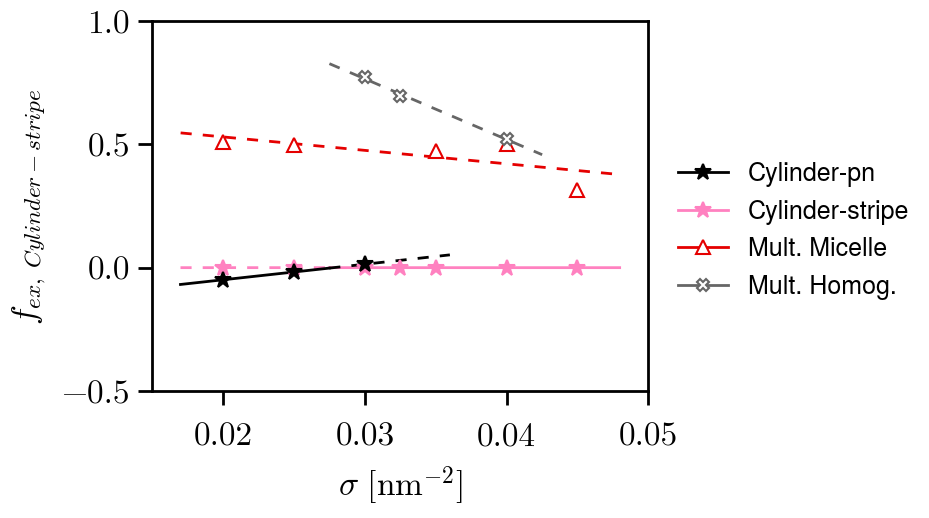

In [125]:
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':10}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':8 }, 
    'fus': {'marker':'p', 'c':'xkcd:green', 'ms':10}, 
    'hol': {'marker':'H', 'c':'xkcd:blue' , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':10},
    'cyl-pn': {'marker':'*', 'c':'xkcd:black', 'ms':12},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':12},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':10},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':8},
    
    'mic-2': {'marker':'^', 'c':'xkcd:red','mfc':'w',  'ms':10}, 
    'str-2': {'marker':'P', 'c':'xkcd:clay','mfc':'w', 'ms':10},
    'hom-2': {'marker':'X', 'c':'0.4','mfc':'w', 'ms':8},
}

f = plotF('alpha', 0.30, ('cyl-str','cyl-pn', 'mic-2', 'hom-2'), ref_morph='cyl-str', 
          morph_filter = {'cyl-pn':(0.019,0.035), 'cyl-str': (0,0.045), 'hom-2':(0.025, 1)}, 
          morph_xxs = {'cyl-pn': (0.017, 0.035), 'cyl-str': (0.017, 0.048), 'mic-2': (0.017, 0.047), 'hom-2': (0.0275, 0.0425)},
          meta_xxs = {'cyl-pn': [[0.0275, 0.036]], 'cyl-str': [[0.017, 0.0275]], 'mic-2': [[0.01701, 0.048]], 'hom-2': [[0.02751, 0.0425]]},
          show_raw=True, 
          s_dict={'cyl': 1e-04, 'cyl-pn':1e-01, 'cyl-str': 1e-07, 'mic-2': 1e-01,'hom-2': 1e-01}, 
          k_dict = {'cyl': 1, 'cyl-pn':1, 'cyl-str': 3, 'mic-2': 1, 'hom-2': 1},
          ls_meta = (0, (4,4))
)
plt.xlim(0.015, 0.050)
plt.ylim(-0.5, 1.0)


plt.legend(handles=[
    Line2D([0], [0], **morph_ms['cyl-pn'], label='Cylinder-pn'),
    Line2D([0], [0], **morph_ms['cyl-str'], label='Cylinder-stripe'),
    Line2D([0], [0], **morph_ms['mic-2'], label='Mult. Micelle'),
    Line2D([0], [0], **morph_ms['hom-2'], label='Mult. Homog.')
], loc=(1.04, 0.22), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
# f[0].axes[0].set_yticks([-0.08, -0.04, 0, 0.04])
plt.ylabel(r'$f_{ex,\ Cylinder-stripe}$', fontsize=24)

tjy.ticks()